In [85]:
pip install numpy pandas matplotlib tensorflow scikit-learn

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [87]:
data  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Green AI Workshop/ML/ec_data.csv')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [88]:
data.isnull().sum()

,0
temperature,0
humidity,0
wind_speed,0
solar_irradiance,0
energy_consumption,0


In [89]:
x = data[['temperature','humidity','wind_speed','solar_irradiance']].values
y = data['energy_consumption'].values

In [90]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [91]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  Dense(32, activation='relu'),
  Dense(1)
])

In [94]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

In [95]:
history=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 91962.6406 - mae: 274.8881 - val_loss: 83708.9609 - val_mae: 259.0405
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 89788.6875 - mae: 269.8717 - val_loss: 83324.7891 - val_mae: 258.2939
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 85806.8750 - mae: 262.6615 - val_loss: 82727.7344 - val_mae: 257.1325
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 91920.1406 - mae: 273.8414 - val_loss: 81824.9297 - val_mae: 255.3697
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 86711.3516 - mae: 264.4926 - val_loss: 80529.9844 - val_mae: 252.8173
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 90173.9141 - mae: 270.3718 - val_loss: 78677.4297 - val_mae: 249.1218
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 85418.6172 - mae: 263.5491 - val_loss: 76192.5312 - val_mae: 244.0689
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 80666.0312 - mae: 253.0184 - val_loss: 7291

In [96]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 75957.7188 - mae: 243.9595  
Test Mean Absolute Error: 241.43


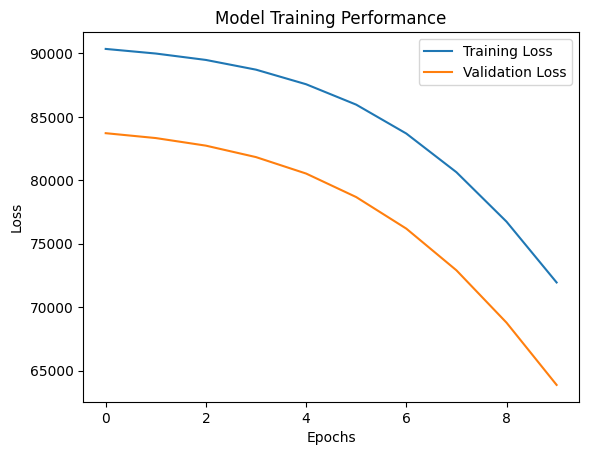

In [97]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [98]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[50.603783],
       [40.504147],
       [44.101875],
       [26.612883],
       [58.324516],
       [60.209595],
       [46.857525],
       [49.030273],
       [47.36901 ],
       [50.99825 ],
       [44.559696],
       [49.859608],
       [38.09219 ],
       [29.002052],
       [40.96034 ],
       [53.481808],
       [47.44531 ],
       [48.29525 ],
       [52.406395],
       [36.035927],
       [50.260628],
       [47.5712  ],
       [36.453304],
       [34.188824],
       [34.792007],
       [35.25968 ],
       [47.690914],
       [55.465626],
       [55.20493 ],
       [43.552963],
       [30.621836],
       [54.507084],
       [36.89244 ],
       [56.332397],
       [51.990078],
       [51.54151 ],
       [26.14533 ],
       [48.635155],
       [37.542698],
       [36.506275],
       [37.422424],
       [39.178024],
       [35.4091  ],
       [35.25077 ],
       [41.035484],
       [48.84003 ],
       [45.487667],
       [40.26881 ],
       [48.86379 ],
       [43.77768 ],


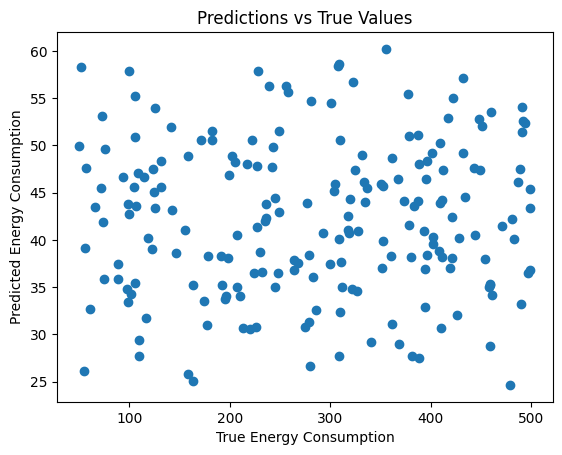

In [99]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()